
 # House Price Prediction using Linear Regression

## Project Overview
House price prediction is a common and practical machine learning problem in the real estate domain. 
The goal of this project is to predict the selling price of a house based on key numerical features 
such as area, number of bedrooms, overall quality, year built, lot frontage, and garage capacity.

Model : **Linear Regression model** 

Dataset : **Kaggle House Price Prediction dataset (`train.csv`)**

---

## Project Workflow
This project follows a complete and structured machine learning pipeline:

1. Data loading and inspection  
2. Feature selection  
3. Handling missing values  
4. Encoding Categorical Feature
5. Exploratory Data Analysis (EDA)  
6. Model training using Linear Regression  
7. Model evaluation using MAE and RMSE  
8. Prediction on unseen (new) house data  


##  Import Required Libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


## Load Dataset
### Dataset Description

The dataset is loaded using the pandas library.  
It contains information about **1460 houses**, where each row represents one house sale.

Each column represents a specific feature of the house, such as:
- Physical size
- Construction quality
- Garage details
- Sale price (target variable)

Before building any model, it is important to inspect the dataset to understand:
- Number of rows and columns
- Data types of each feature
- Presence of missing values


In [144]:
df=pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Inspection

At this stage, we examine:
- The shape of the dataset
- Column data types
- Missing values in each column

This step helps in deciding:
- Which features are suitable for modeling
- Which columns require data cleaning
- Whether the dataset is appropriate for Linear Regression

Understanding the data before modeling is critical to avoid incorrect assumptions 
and runtime errors later in the pipeline.


In [145]:
print("Shape of Dataset" , df.shape)
df.info()
df.describe()
print("Checking for missing values: \n",df.isnull().sum())

Shape of Dataset (1460, 81)
<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int6

## Feature Selection

From the full dataset, a subset of **important numerical features** is selected.
These features were chosen because they logically influence house prices and are 
well-suited for Linear Regression.

*Numerical Features*
- Area (GrLivArea)
- Bedrooms (BedroomAbvGr)
- Overall Quality (OverallQual)
- Year Built (YearBuilt)
- Lot Frontage (LotFrontage)
- Garage Cars (GarageCars)

*Categorical Feature*

- Location(Neighborhood)

Target variable:
- SalePrice



In [146]:
df = df[["GrLivArea","BedroomAbvGr","OverallQual","YearBuilt","Neighborhood","LotFrontage","GarageCars","SalePrice"]]

df.head()


,GrLivArea,BedroomAbvGr,OverallQual,YearBuilt,Neighborhood,LotFrontage,GarageCars,SalePrice
0,1710,3,7,2003,CollgCr,65.0,2,208500
1,1262,3,6,1976,Veenker,80.0,2,181500
2,1786,3,7,2001,CollgCr,68.0,2,223500
3,1717,3,7,1915,Crawfor,60.0,3,140000
4,2198,4,8,2000,NoRidge,84.0,3,250000


## Rename columns

In [149]:
df.columns = [ "Area",    "Bedrooms", "Quality",  "YearBuilt","Location", "LotFrontage","GarageCars","Price"]
df.head(10)

,Area,Bedrooms,Quality,YearBuilt,Location,LotFrontage,GarageCars,Price
0,1710,3,7,2003,CollgCr,65.0,2,208500
1,1262,3,6,1976,Veenker,80.0,2,181500
2,1786,3,7,2001,CollgCr,68.0,2,223500
3,1717,3,7,1915,Crawfor,60.0,3,140000
4,2198,4,8,2000,NoRidge,84.0,3,250000
5,1362,1,5,1993,Mitchel,85.0,2,143000
6,1694,3,8,2004,Somerst,75.0,2,307000
7,2090,3,7,1973,NWAmes,NaN,2,200000
8,1774,2,7,1931,OldTown,51.0,2,129900
9,1077,2,5,1939,BrkSide,50.0,1,118000


## Handling Missing Values

Some selected features contain missing values, which can cause issues during model training.

To handle this:
- Missing numerical values are filled using the **median**
- Median is preferred over mean because it is less affected by outliers

This approach ensures:
- No rows are removed unnecessarily
- The dataset remains consistent
- The model can train without errors

After filling missing values, the dataset becomes clean and ready for analysis and modeling.


In [ ]:
print("Print missing values before cleaning\n",df.isnull().sum())

Print missing values before cleaning
 GrLivArea         0
BedroomAbvGr      0
OverallQual       0
YearBuilt         0
LotFrontage     259
GarageCars        0
SalePrice         0
dtype: int64


In [ ]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].median())

In [ ]:
print("Print missing values after cleaning\n",df.isnull().sum())

Print missing values after cleaning
 GrLivArea       0
BedroomAbvGr    0
OverallQual     0
YearBuilt       0
LotFrontage     0
GarageCars      0
SalePrice       0
dtype: int64


## Encoding the Location Feature

The dataset contains a categorical feature representing the **location of the house**.  
Since machine learning models like **Linear Regression** can only work with numerical values, 
categorical variables must be converted into numeric form before model training.

### Why Encoding is Required
- Location is stored as text (e.g., area or neighborhood names)
- Linear Regression cannot interpret text values
- Encoding allows the model to learn patterns related to different locations

### Encoding Technique Used
**Label Encoding** is applied to the Location feature:

- Each unique location name is assigned a unique numeric value
- The encoded values act as identifiers for different locations
- This method is simple and suitable for a baseline Linear Regression model

### Important Note
Label Encoding does not imply any ranking or order between locations.  
It is used here only to make the data compatible with the model.

After encoding, the Location feature becomes a numerical column and can be 
used safely along with other numerical features for training the model.


In [151]:
le= LabelEncoder()
df["Location"] = le.fit_transform(df["Location"])
df.head()

,Area,Bedrooms,Quality,YearBuilt,Location,LotFrontage,GarageCars,Price
0,1710,3,7,2003,5,65.0,2,208500
1,1262,3,6,1976,24,80.0,2,181500
2,1786,3,7,2001,5,68.0,2,223500
3,1717,3,7,1915,6,60.0,3,140000
4,2198,4,8,2000,15,84.0,3,250000


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps in understanding the relationship between features and the target variable.

In this step, we visualize the relationship between:
- **House Area** vs **House Price**
- **Bedrooms** vs **House Price**
- **Location** vs **House Price**
- **Quality** vs **House Price**
- **Year Built** vs **House Price**

A scatter plot is used to observe trends, patterns, and potential outliers.


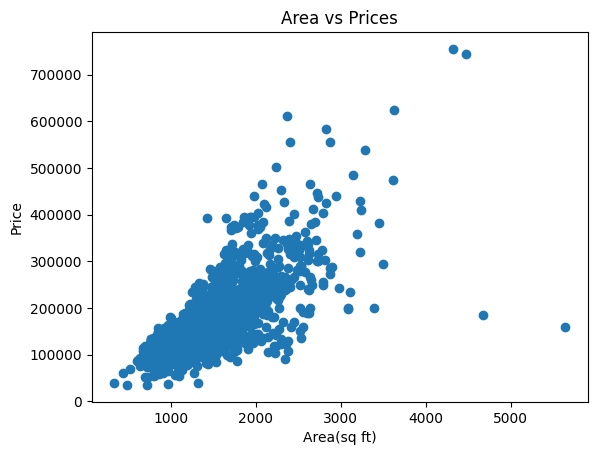

In [ ]:

plt.scatter(df['Area'],df['Price'])
plt.xlabel("Area(sq ft)")
plt.ylabel("Price")
plt.title("Area vs Prices")
plt.show()

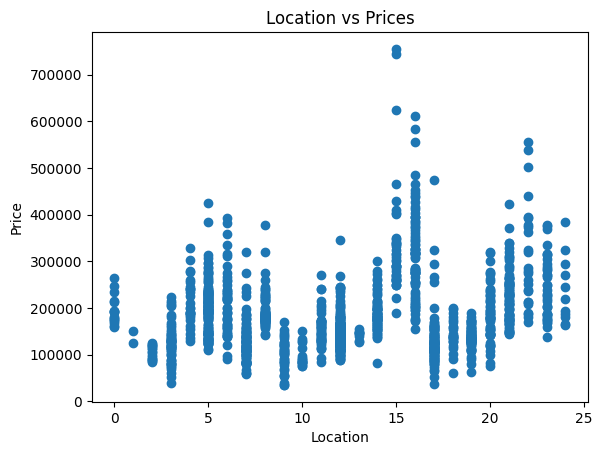

In [157]:

plt.scatter(df['Location'],df['Price'])
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("Location vs Prices")
plt.show()

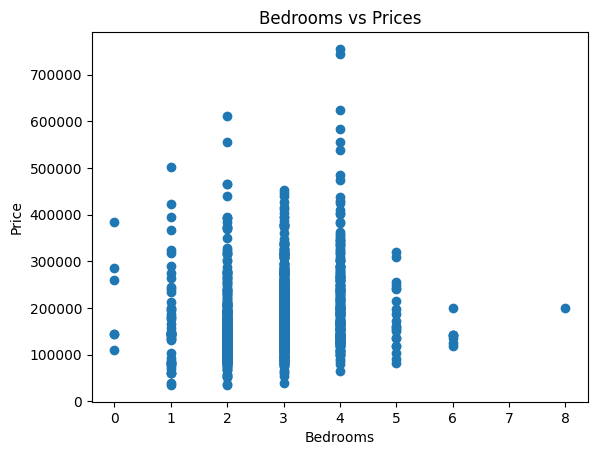

In [158]:

plt.scatter(df['Bedrooms'],df['Price'])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Prices")
plt.show()

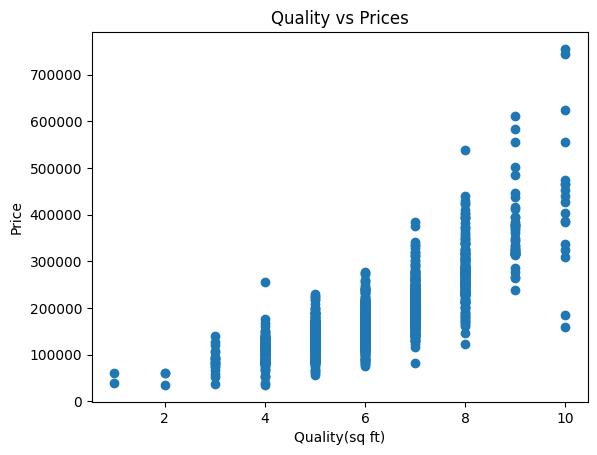

In [156]:

plt.scatter(df['Quality'],df['Price'])
plt.xlabel("Quality(sq ft)")
plt.ylabel("Price")
plt.title("Quality vs Prices")
plt.show()

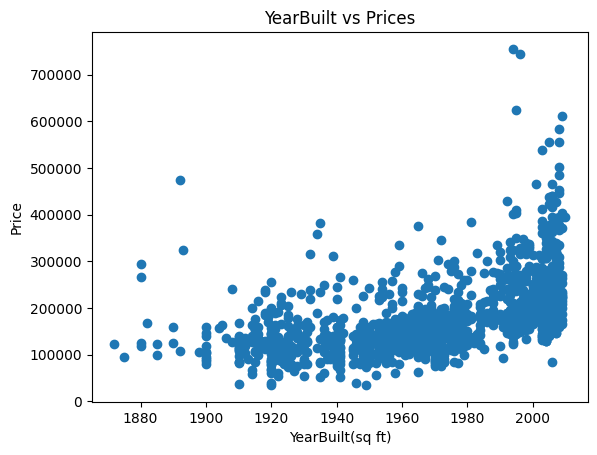

In [159]:

plt.scatter(df['YearBuilt'],df['Price'])
plt.xlabel("YearBuilt(sq ft)")
plt.ylabel("Price")
plt.title("YearBuilt vs Prices")
plt.show()

## Exploratory Data Analysis (EDA) Results

Exploratory Data Analysis was performed to understand the relationship between house prices and different influencing features before building the prediction model.
 Scatter plots were used to visually analyze how each independent variable affects the house price.
 
-  The ` Area vs Price` plot shows a strong positive linear relationship, indicating that larger houses generally have higher prices. This confirms that area is a key factor in price prediction.

- The `bedrooms vs Price` graph shows that houses with more bedrooms tend to have higher prices, although the relationship is not perfectly linear. This suggests that bedrooms influence price but are not the only determining factor.

- The  `Quality vs Price` plot demonstrates a clear positive trend, where higher construction quality is associated with significantly higher prices. This indicates that quality is a strong predictor of house value.

- The `Location vs Price` graph highlights that certain locations consistently have higher prices than others. This shows that location plays a crucial role in house pricing, even though it behaves as a categorical feature rather than a continuous one.

- Finally, the `YearBuilt vs Price` plot shows that newer houses generally have higher prices compared to older ones, suggesting that modern construction and recent developments add value to properties.

Overall, these visualizations helped identify important features, understand their impact on house prices, and justify the use of linear regression for predictive modeling.


## Prepare Features And Target

Before training the model:
- Features are stored in `X`
- Target variable is stored in `y`




In [ ]:
X = df[["Area" , "Bedrooms" , "Quality" , "YearBuilt" , "Location" ,"LotFrontage","GarageCars"]]
y=df["Price"]
print(type(X) ,X.shape)
print(type(y) ,y.shape)

<class 'pandas.DataFrame'> (1460, 7)
<class 'pandas.Series'> (1460,)


## Train and Test Split
The dataset is then split into:
- **Training set (80%)** → used to train the model
- **Testing set (20%)** → used to evaluate performance

This separation ensures that the model is evaluated on unseen data, 
which helps measure its real-world prediction capability.

In [ ]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42)


## Model Training using Linear Regression

Linear Regression is a supervised learning algorithm that models the relationship 
between input features and a continuous target variable.

During training:
- The model learns coefficients for each feature
- These coefficients represent how much each feature contributes to the house price

Linear Regression is chosen because:
- It is easy to interpret
- It provides a strong baseline model
- It is suitable for structured numerical data


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Predict

In [ ]:
y_pred = model.predict(X_test)



## Model Evaluation

The trained model is evaluated using two metrics:

### Mean Absolute Error (MAE)
- Measures the average absolute difference between actual and predicted prices
- Easy to interpret
- Represents average prediction error

### Root Mean Squared Error (RMSE)
- Penalizes large errors more heavily
- Useful for understanding model performance on expensive houses

Using both metrics provides a balanced evaluation of model accuracy.


### MAE

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE" , mae)

MAE 26841.31275823186


### RMSE

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 40698.950655825734


## Plot Actual vs Predicted Price

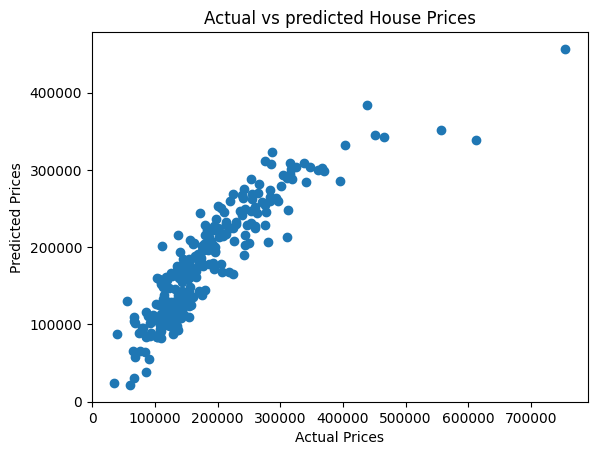

In [ ]:

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs predicted House Prices")
plt.show()

## Insights from Actual vs Predicted Plot

The Actual vs Predicted scatter plot provides the following insights:

- Many points lie close to the diagonal line, indicating good predictions
- Predictions are more accurate for **mid-range house prices**
- Larger errors are observed for **very expensive houses**

This behavior is expected because Linear Regression assumes a linear relationship 
and may not fully capture complex pricing patterns for high-end properties.


--- 

## Single House Price Prediction

To demonstrate real-world usage, the model is used to predict the price of a 
single house with the following features:

- Area: 2000 sq ft
- Bedrooms: 3
- Quality: 7
- Year Built: 2005
- Location: 8
- Lot Frontage: 60
- Garage Cars: 2

This step shows how the trained model can be used for practical decision-making 
and not just evaluation metrics.


In [152]:
sample_house = [[
    2000,  # Area
    3,     # Bedrooms
    7,     # Quality
    2005,  # YearBuilt
    8,      # Location
    60,    # LotFrontage
    2      # GarageCars
]]

predicted_price = model.predict(sample_house)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 240186.39668528677


c:\Users\hp\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- 

## Conclusion and Key Findings

This project successfully demonstrates a complete machine learning pipeline 
for predicting house prices using Linear Regression.

### Key Insights
- House price increases with larger living area
- Overall quality has a strong impact on price
- Newer houses generally have higher prices
- Garage capacity and lot frontage contribute moderately to price prediction

### Most Influential Features
Based on model behavior and data analysis:
1. **Area**
2. **Overall Quality**
3. **Year Built**

These features have the strongest influence on house prices.

### Final Remarks
- Linear Regression provides a solid baseline model
- The model performs well for average-priced houses
- More advanced models could further improve accuracy for high-end properties


